<a href="https://colab.research.google.com/github/Pablix17/Inteligencia-Artificial-2023/blob/main/Taller_ADC_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller Viernes Semana 15

### Árbol de Decisión

¿Cómo determina el árbol qué características son las más importantes?

Se determina  partiendo de la rama que generé mejor separación de los datos, calculando la impureza de la dispersión, hay distintos métodos como la entropía y la ganancia de información, pero en el video lo explican usando el índice de Gini, el cual consiste en primero calcular la impureza de cada una de las ramas de la siguiente manera (1- la sumatoria de las probabilidades de cada clase al cuadrado.) pero como las ramas no necesariamente tienen la misma cantidad de datos, se requiere hacer una suma ponderada de los índices y así se obtiene el índice de la rama. el que tiene menor índice se coloca más arriba.

¿Qué sucedería si aumentas la profundidad máxima del árbol? ¿Y si la reduces?

Si se aumenta la profundidad del árbol, se puede llegar al sobre ajuste, teniendo hojas que solo tengan un valor en sus clases. si se reduce, no necesariamente se llegan a hojas puras bajando la precisión del clasificador.


¿Cuáles son las principales ventajas y desventajas de los árboles de decisión?

Ventajas:
*   Fácil de entender.
*   Manejo de datos categóricos.
*   Pueden usarse para regresión o clasificación.
*   Sirven para conjuntos de datos grandes y pequeños
* No requieren normalizar los datos antes de trabajarlos.

Desventajas
* Sobreajuste.
* Sesgo preferente a las clases dominantes.
* Pequeños cambios en el conjunto de entrenamiento causan cambios grandes en el modelo.







In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
iris= load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=14)
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc_dtc=matthews_corrcoef(y_test,DTC.predict(X_test))
print("el MCC del arbol de decision  es: ",mcc_dtc)

el MCC del arbol de decision  es:  0.94922501017364


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.9666666666666667


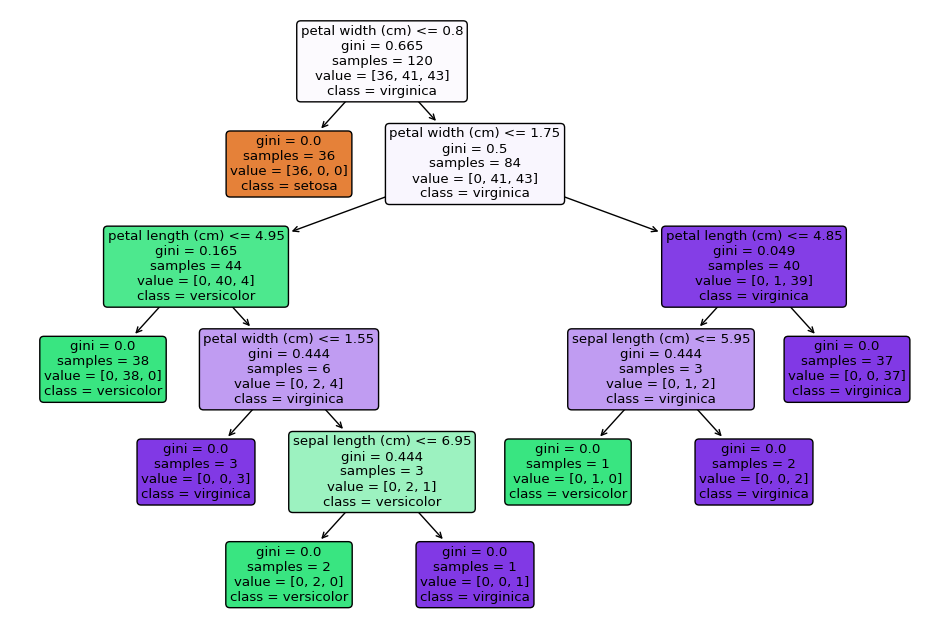

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(DTC, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

### Random Forest
¿Por qué se considera que Random Forest es un "ensamble" de árboles de decisión?

Random Forest toma como sustento los árboles de decisión, los cuales son fáciles de construir e interpretar, pero son inexactos, son excelentes con la información que se usa para crearlos, pero no se adaptan bien a nuevas muestras. Por ello es un ensamble ya que toma la simplicidad del árbol y corrige su problema de inexactitud.

¿Cómo decide Random Forest qué árboles generar y cómo combinar sus resultados?

Se parte de realizar "bootstrapping", en donde se seleccionan datos al azar del conjunto de entrenamiento, con reemplazo, es decir se pueden repetir datos en el nuevo subconjunto, dicha acción se realiza repetidas veces con el fin de generar distintos conjuntos permitiendo variabilidad en el árbol, se generan arboles empleando subconjuntos aleatorios de cada división. Finalmente, para realizar predicción se elije la clase mediante votación.

¿En qué situaciones podría ser preferible usar Random Forest en lugar de un árbol de decisión único?

Es preferible usar Random Forest , por su tratamiento adecuado de los datos, es mas receptivo a nueva información y no se ve afectado por datos faltantes o cambios en el conjunto de entrenamiento y lo mas importante es que evita el sobre ajuste, cuidando la precisión de predicción.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100, random_state=14)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

In [ ]:
mcc_rfc=matthews_corrcoef(y_test,RFC.predict(X_test))
print("el MCC del Random Forest  es: ",mcc_rfc)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Random Forest: {accuracy}")

el MCC del Random Forest  es:  0.94922501017364
Precisión del modelo Random Forest: 0.9666666666666667


Con esta distribución aleatoria de datos entre test y train, se obtiene que el coeficiente de correlación de Matthews es igual para ambas situaciones, esto se podría explicar dado que el conjunto de Iris no es uno muy grande, es de pocas características, por ello no hay diferencia significativa entre modelos. Si fuera más robusto ahí si notásemos una mejora al emplear random forest.  